In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections
import warnings
warnings.filterwarnings('ignore')

In [2]:
file1 = open("codeassist-logs.txt", "r")

t = []
length = 0
outcome = {}
for line in file1:
    line = line.split("- -")
    #print(line[0])
    outcome[line[0]] = []
    line = line[1].split("?")
    line = line[1].split()
    line = line[0].split("&")
    t.append(line)
    #print(line)
    length+=1
file1.close()
for i in t:
    if len(i) < 6:
        while len(i) < 6:
            i.append('N/A')

for i in t:
    tp = i[:]
    for j in tp:
    #print(i)
        j = j.split("=")
        if len(j)>1:
        #.remove(i[0])
        #print(i)
            i.append(j[1])
        else:
            i.append(j)
for i in t:
    i.remove(i[0])
    i.remove(i[0])
    i.remove(i[0])
    i.remove(i[0])
    i.remove(i[0])
    i.remove(i[0])


In [3]:
count = 0 
file1 = open("codeassist-logs.txt", "r")
lines = file1.readlines()
#print(lines[20])
while count <= len(t)-1:
    lines[count] = lines[count].split("- -")
    t[count].append(lines[count][0])
    count+=1


file1.close()

In [4]:
file1 = open("codeassist-logs.txt", "r")
for line in file1:
    line = line.split(" - - ")
    line[1] = line[1].split(" ")
    line[1][0] = line[1][0][1:]
    #line[1][0].remove("[")
    #print(line[1][0])
    
count = 0 
file1 = open("codeassist-logs.txt", "r")
lines = file1.readlines()
#print(lines[20])
while count <= len(t)-1:
    lines[count] = lines[count].split("- -")
    #print(lines[count][1])
    lines[count][1] = lines[count][1].split(" ")
    #print(lines[count][1])
    lines[count][1][1] = lines[count][1][1][1:]
    #print(lines[count][1][1])
    t[count].append(lines[count][1][1])
    count+=1

In [5]:
df = pd.DataFrame([i for i in t],columns = ['Username', 'Course', 'Lang', 'Nr', 'Feedback', 'complieCheck', 'IP Address', "Login time"])
df

,Username,Course,Lang,Nr,Feedback,complieCheck,IP Address,Login time
0,tschurder0518,cs665,Java,Assignment-4,spotbugs,yes,136.32.43.68,19/Apr/2021:17:09:37
1,gchriswill,cs665,Java,Assignment-2,spotbugs,yes,70.120.122.28,19/Apr/2021:18:17:36
2,gchriswill,cs665,Java,Assignment-2,spotbugs,"yes""",70.120.122.28,19/Apr/2021:18:17:37
3,gchriswill,cs665,Java,Assignment-2,spotbugs,yes,70.120.122.28,19/Apr/2021:18:29:32
4,gchriswill,cs665,Java,Assignment-2,stylegoogle,yes,70.120.122.28,19/Apr/2021:18:29:51
...,...,...,...,...,...,...,...,...
896,gchriswill,cs665,Java,assignment-project,spotbugs,yes,100.17.19.135,01/May/2021:22:40:26
897,kecarr9,cs665,Java,assignment-project,spotbugs,yes,100.17.19.135,01/May/2021:22:50:30
898,kaihu-cs,cs665,Java,assignment-project,spotbugs,yes,100.17.19.135,01/May/2021:22:51:14
899,darkhosh,cs665,Java,assignment-project,spotbugs,yes,100.17.19.135,02/May/2021:11:00:31


In [6]:
# remove N/A data
df = df[df['Course'].str.contains('cs')]
df.head(50)
df[df['Nr'] == 'Assignment-1']

,Username,Course,Lang,Nr,Feedback,complieCheck,IP Address,Login time
47,kiatest,cs665,Java,Assignment-1,tests,yes,128.197.206.106,20/Apr/2021:14:09:42
100,evscheff,cs665,Java,Assignment-1,uml,yes,76.25.230.242,21/Apr/2021:22:27:03
101,evscheff,cs665,Java,Assignment-1,uml,"yes""",76.25.230.242,21/Apr/2021:22:27:04
102,evscheff,cs665,Java,Assignment-1,uml,"yes""",76.25.230.242,21/Apr/2021:22:27:10
165,wruoting,cs665,Java,Assignment-1,spotbugs,yes,128.197.206.129,23/Apr/2021:16:09:26
...,...,...,...,...,...,...,...,...
513,edgardcypher,cs665,Java,Assignment-1,uml,"yes""",73.123.188.220,26/Apr/2021:06:53:47
613,sokmena,cs665,Java,Assignment-1,uml,yes,24.133.129.86,27/Apr/2021:08:06:07
614,sokmena,cs665,Java,Assignment-1,uml,"yes""",24.133.129.86,27/Apr/2021:08:06:07
713,edgardcypher,cs665,Java,Assignment-1,uml,"yes""",73.123.188.220,28/Apr/2021:07:02:16


In [7]:
# anonymize IP Address
df['IP Address'] = df['IP Address'].map(lambda x:x.split('.')[2]) + df['IP Address'].map(lambda x:x.split('.')[3]) + df['IP Address'].map(lambda x:x.split('.')[0]) + df['IP Address'].map(lambda x:x.split('.')[1])
df

,Username,Course,Lang,Nr,Feedback,complieCheck,IP Address,Login time
0,tschurder0518,cs665,Java,Assignment-4,spotbugs,yes,4368 13632,19/Apr/2021:17:09:37
1,gchriswill,cs665,Java,Assignment-2,spotbugs,yes,12228 70120,19/Apr/2021:18:17:36
2,gchriswill,cs665,Java,Assignment-2,spotbugs,"yes""",12228 70120,19/Apr/2021:18:17:37
3,gchriswill,cs665,Java,Assignment-2,spotbugs,yes,12228 70120,19/Apr/2021:18:29:32
4,gchriswill,cs665,Java,Assignment-2,stylegoogle,yes,12228 70120,19/Apr/2021:18:29:51
...,...,...,...,...,...,...,...,...
896,gchriswill,cs665,Java,assignment-project,spotbugs,yes,19135 10017,01/May/2021:22:40:26
897,kecarr9,cs665,Java,assignment-project,spotbugs,yes,19135 10017,01/May/2021:22:50:30
898,kaihu-cs,cs665,Java,assignment-project,spotbugs,yes,19135 10017,01/May/2021:22:51:14
899,darkhosh,cs665,Java,assignment-project,spotbugs,yes,19135 10017,02/May/2021:11:00:31


In [8]:
# add date and time.
df['date'] = df['Login time'].map(lambda x:x.split('/')[0])
df['month'] = df['Login time'].map(lambda x:x.split('/')[1])
df['time'] = df['Login time'].map(lambda x:x.split('/')[2])
df['day'] = df['Login time'].map(lambda x:x.split('/')[1]) +  df['Login time'].map(lambda x:x.split('/')[0])
df


,Username,Course,Lang,Nr,Feedback,complieCheck,IP Address,Login time,date,month,time,day
0,tschurder0518,cs665,Java,Assignment-4,spotbugs,yes,4368 13632,19/Apr/2021:17:09:37,19,Apr,2021:17:09:37,Apr19
1,gchriswill,cs665,Java,Assignment-2,spotbugs,yes,12228 70120,19/Apr/2021:18:17:36,19,Apr,2021:18:17:36,Apr19
2,gchriswill,cs665,Java,Assignment-2,spotbugs,"yes""",12228 70120,19/Apr/2021:18:17:37,19,Apr,2021:18:17:37,Apr19
3,gchriswill,cs665,Java,Assignment-2,spotbugs,yes,12228 70120,19/Apr/2021:18:29:32,19,Apr,2021:18:29:32,Apr19
4,gchriswill,cs665,Java,Assignment-2,stylegoogle,yes,12228 70120,19/Apr/2021:18:29:51,19,Apr,2021:18:29:51,Apr19
...,...,...,...,...,...,...,...,...,...,...,...,...
896,gchriswill,cs665,Java,assignment-project,spotbugs,yes,19135 10017,01/May/2021:22:40:26,01,May,2021:22:40:26,May01
897,kecarr9,cs665,Java,assignment-project,spotbugs,yes,19135 10017,01/May/2021:22:50:30,01,May,2021:22:50:30,May01
898,kaihu-cs,cs665,Java,assignment-project,spotbugs,yes,19135 10017,01/May/2021:22:51:14,01,May,2021:22:51:14,May01
899,darkhosh,cs665,Java,assignment-project,spotbugs,yes,19135 10017,02/May/2021:11:00:31,02,May,2021:11:00:31,May02


In [9]:
df['User_assignment'] = df['Username'] + '-' + df['Nr']
df

,Username,Course,Lang,Nr,Feedback,complieCheck,IP Address,Login time,date,month,time,day,User_assignment
0,tschurder0518,cs665,Java,Assignment-4,spotbugs,yes,4368 13632,19/Apr/2021:17:09:37,19,Apr,2021:17:09:37,Apr19,tschurder0518-Assignment-4
1,gchriswill,cs665,Java,Assignment-2,spotbugs,yes,12228 70120,19/Apr/2021:18:17:36,19,Apr,2021:18:17:36,Apr19,gchriswill-Assignment-2
2,gchriswill,cs665,Java,Assignment-2,spotbugs,"yes""",12228 70120,19/Apr/2021:18:17:37,19,Apr,2021:18:17:37,Apr19,gchriswill-Assignment-2
3,gchriswill,cs665,Java,Assignment-2,spotbugs,yes,12228 70120,19/Apr/2021:18:29:32,19,Apr,2021:18:29:32,Apr19,gchriswill-Assignment-2
4,gchriswill,cs665,Java,Assignment-2,stylegoogle,yes,12228 70120,19/Apr/2021:18:29:51,19,Apr,2021:18:29:51,Apr19,gchriswill-Assignment-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,gchriswill,cs665,Java,assignment-project,spotbugs,yes,19135 10017,01/May/2021:22:40:26,01,May,2021:22:40:26,May01,gchriswill-assignment-project
897,kecarr9,cs665,Java,assignment-project,spotbugs,yes,19135 10017,01/May/2021:22:50:30,01,May,2021:22:50:30,May01,kecarr9-assignment-project
898,kaihu-cs,cs665,Java,assignment-project,spotbugs,yes,19135 10017,01/May/2021:22:51:14,01,May,2021:22:51:14,May01,kaihu-cs-assignment-project
899,darkhosh,cs665,Java,assignment-project,spotbugs,yes,19135 10017,02/May/2021:11:00:31,02,May,2021:11:00:31,May02,darkhosh-assignment-project


In [10]:
# Find a list of user - project pair
user_project = df[['Username', 'Nr']].drop_duplicates()
user_project

,Username,Nr
0,tschurder0518,Assignment-4
1,gchriswill,Assignment-2
6,gchriswill,Assignment-3
13,testname,Assignment-3
36,evscheff,assignment-project
...,...,...
854,npool1,Assignment-6
882,kphung29,Assignment-6
896,gchriswill,assignment-project
898,kaihu-cs,assignment-project


In [11]:
# Q1: What is the submission count of each user per assignment? 
groups = df.groupby(['Username', 'Nr']).count()['Feedback']
groups

Username          Nr                
                  Assignment-1           5
                  Assignment-3           2
                  Assignment-4           1
IndiraSomavarapu  Assignment-6          12
                  assignment-project    13
                                        ..
wruoting          assignment-project     8
xianghuang1993    Assignment-6           4
                  assignment-project     6
yakidzoba         Assignment-6          13
                  assignment-project    20
Name: Feedback, Length: 77, dtype: int64

In [12]:
# Q2: What is the max submission count? (separated by assignment)
df2 = df.groupby(['Username','Nr']).count()['Feedback']
df2_1 = pd.DataFrame(df2)
df2_1[df2_1['Feedback'] == df2.max()]

,,Feedback
Username,Nr,
SheenaShahangian,Assignment-6,48


In [13]:
# Q3: What is the average of submission count? (separated by assignment)
df3 = df.groupby(['Nr']).count()['Feedback']
df3_1 = pd.DataFrame(df3)
df3_1['Feedback']/len(df['Username'].unique())

Nr
Assignment-1           1.648649
Assignment-2           0.189189
Assignment-3           0.486486
Assignment-4           0.486486
Assignment-6           8.081081
assignment-project    13.000000
Name: Feedback, dtype: float64

In [14]:
# Q4: What is the median of submission count?(separated by assignment)
df4 = df.groupby(['Username','Nr']).count()['Feedback']
df4_1 = pd.DataFrame(df4)
df4_1.groupby(['Nr']).median()

,Feedback
Nr,
Assignment-1,5.0
Assignment-2,7.0
Assignment-3,2.0
Assignment-4,2.0
Assignment-6,8.5
assignment-project,14.0


In [15]:
# Q5: What is the most asked submission type? (build, test)
groups = df[df['Nr'] != None]
feedbacks = groups['Feedback'].value_counts()
print(feedbacks.nlargest(1))


uml    250
Name: Feedback, dtype: int64


In [16]:
# Q6: How many submissions need compile check?
df_with_check = df[df['complieCheck'] == 'yes']
len(df_with_check)

636

In [17]:
# Q7: How many submissions were made each day?
df7 = df.groupby(['day']).count()['Feedback']
df7_1 = pd.DataFrame(df7)
df7_1


,Feedback
day,
Apr19,30
Apr20,35
Apr21,24
Apr22,56
Apr23,53
Apr24,107
Apr25,149
Apr26,94
Apr27,148


{'Apr19': 30, 'Apr20': 35, 'Apr21': 24, 'Apr22': 56, 'Apr23': 53, 'Apr24': 107, 'Apr25': 149, 'Apr26': 94, 'Apr27': 148, 'Apr28': 63, 'Apr29': 95, 'Apr30': 17, 'May01': 11, 'May02': 2}


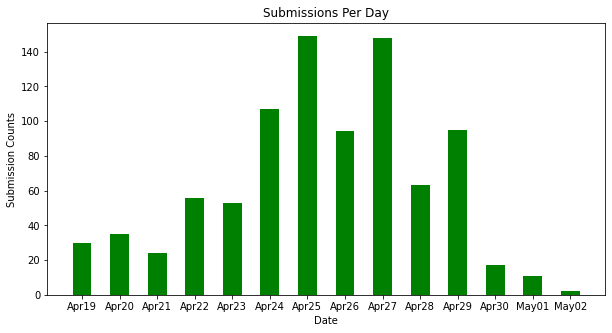

In [18]:
# Matplotlib 

# Add Visualizations and Graphs

# A Bar Plot that shows the submission number per day.
b = collections.Counter(df['day'])
data_dict = {number: value for number, value in b.items()}
print(data_dict)
days = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(days, values, color ='green',
        width = 0.5)
plt.title('Submissions Per Day')
plt.xlabel('Date')
plt.ylabel('Submission Counts')
plt.show()


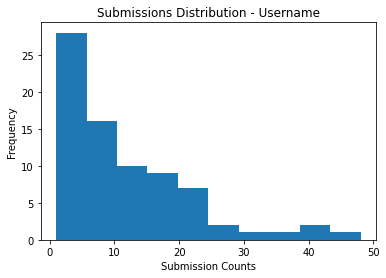

In [19]:
# A histogram that shows the distribution of submissions per assignments per user
groups = df.groupby(['Username', 'Nr']).count()['Feedback']
groups
plt.hist(groups)
plt.title('Submissions Distribution - Username')
plt.xlabel('Submission Counts')
plt.ylabel('Frequency')
plt.show()
#The vast majority of assignments are submitted in the first two intervals

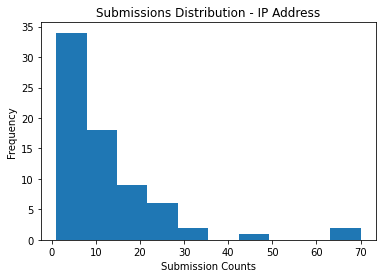

In [20]:
# A histogram that shows the distribution of submissions per assignments per IP Address
groups = df.groupby(['IP Address', 'Nr']).count()['Feedback']
groups
plt.hist(groups)
plt.title('Submissions Distribution - IP Address')
plt.xlabel('Submission Counts')
plt.ylabel('Frequency')
plt.show()
# The vast majority of assignments are submitted in the first two intervals
# The result is different from the distribution based on user ID
# It looks like there are different users using the same IP address

In [ ]:
# 1:python script file
# for each of these questions and charts
# store the plots as pdf file

# 2:python file
# given original dataset
# anonymize the username and ip address
# store the result in a seperate file

# 3:copy to my own machine

# 4:make the everyday submissions a normal plot (with lines)

# 5:generate the histogram of submission per assignment per user

# 6:plotly
# per hour, closer to ddl, more submissions

# 7: shellscript
# username
# connect it to the link
# get history